In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("bike_sharing.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [32]:
data.isnull().count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [33]:
data = data.drop(columns=['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 
                                'weekday','workingday', 'weathersit','atemp', 'hum', 'windspeed', 
                                'casual','registered'], axis=1)
data.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [34]:
data.replace(np.NaN,data.mean(),inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [36]:
data = pd.DataFrame(data)

In [37]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [38]:
X

array([[-1.33464759],
       [-1.4385164 ],
       [-1.4385164 ],
       ...,
       [-1.23077877],
       [-1.23077877],
       [-1.23077877]])

In [39]:
Y

array([-0.95633924, -0.82402209, -0.8681278 , ..., -0.54836135,
       -0.70824458, -0.77440315])

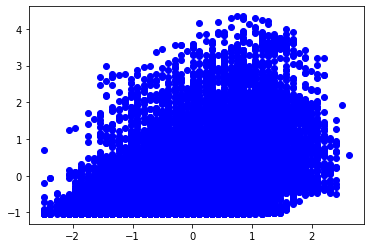

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X,Y,color = "blue")

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 0)

In [42]:
x_train

array([[-0.39982828],
       [ 0.63885983],
       [-0.71143472],
       ...,
       [-1.33464759],
       [-0.39982828],
       [ 0.74272864]])

In [43]:
y_train

array([-0.91223352,  1.37023735, -0.52630849, ..., -1.01147139,
       -0.66413886,  1.8774531 ])

In [44]:
y_test

array([-1.00595817, -1.0169846 ,  3.05176782, ..., -0.9783921 ,
        2.2523517 ,  0.87956125])

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(x_test)

In [47]:
y_pred

array([ 0.12792967, -0.12128215, -0.12128215, ...,  0.54328272,
        0.25253559,  0.70942394])

In [48]:
y_test

array([-1.00595817, -1.0169846 ,  3.05176782, ..., -0.9783921 ,
        2.2523517 ,  0.87956125])

In [49]:
#Calculating Error
residue = y_pred - y_test    # residue or error between actual and predicted salary
residue

array([ 1.13388785,  0.89570245, -3.17304998, ...,  1.52167482,
       -1.99981611, -0.1701373 ])

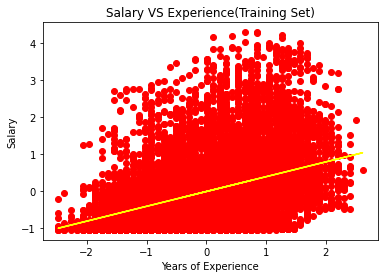

In [50]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

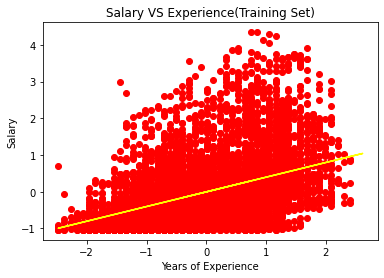

In [51]:
plt.scatter(x_test,y_test,color="Red")
plt.plot(x_train,regressor.predict(x_train),color="yellow")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                           #built-in function r2_score() indicates R-squared value 

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 0.9119529993170911
R2 Score= 0.17166379830792078
